In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.datasets import load_digits
from sklearn import svm,metrics

In [2]:
digits = load_digits()

In [3]:
print(digits.data)
print(np.unique( digits.target))

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 3 4 5 6 7 8 9]


In [4]:
print(digits.images[3])

[[ 0.  0.  7. 15. 13.  1.  0.  0.]
 [ 0.  8. 13.  6. 15.  4.  0.  0.]
 [ 0.  2.  1. 13. 13.  0.  0.  0.]
 [ 0.  0.  2. 15. 11.  1.  0.  0.]
 [ 0.  0.  0.  1. 12. 12.  1.  0.]
 [ 0.  0.  0.  0.  1. 10.  8.  0.]
 [ 0.  0.  8.  4.  5. 14.  9.  0.]
 [ 0.  0.  7. 13. 13.  9.  0.  0.]]


In [5]:
#flattern
n_samples = len(digits.images)
data_images = digits.images.reshape((n_samples, -1))
print(data_images[3])


[ 0.  0.  7. 15. 13.  1.  0.  0.  0.  8. 13.  6. 15.  4.  0.  0.  0.  2.
  1. 13. 13.  0.  0.  0.  0.  0.  2. 15. 11.  1.  0.  0.  0.  0.  0.  1.
 12. 12.  1.  0.  0.  0.  0.  0.  1. 10.  8.  0.  0.  0.  8.  4.  5. 14.
  9.  0.  0.  0.  7. 13. 13.  9.  0.  0.]


In [6]:
print(len(digits.images))

1797


In [7]:
from sklearn import preprocessing

In [8]:
clf=svm.LinearSVC(max_iter=10000)
x=preprocessing.scale(data_images[:n_samples // 2])
y= digits.target[:n_samples // 2]
clf.fit(x,y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=10000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [9]:
expected = digits.target[n_samples // 2:]
predicted = clf.predict(data_images[n_samples // 2:])

prediction:  [5]




Text(0.5, 1.0, 'actual number')

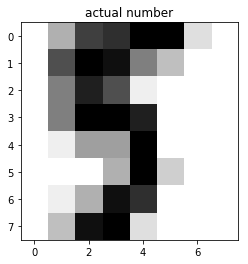

In [12]:
#machine prediction
print('prediction: ',clf.predict(data_images[[15]]))
print('\n')
#actual number
plt.imshow(digits.images[15],cmap=plt.cm.gray_r,interpolation='nearest')
plt.title('actual number')

In [24]:
#evaluate
print("Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(expected, predicted)))

Classification report for classifier LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=10000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0):
              precision    recall  f1-score   support

           0       0.99      0.76      0.86        88
           1       0.38      0.99      0.55        91
           2       1.00      0.87      0.93        86
           3       1.00      0.41      0.58        91
           4       1.00      0.51      0.68        92
           5       0.80      0.81      0.81        91
           6       0.89      0.80      0.84        91
           7       1.00      0.42      0.59        89
           8       0.48      0.84      0.61        88
           9       0.90      0.72      0.80        92

   micro avg       0.71      0.71      0.71       899
   macro avg       0.84      0.71      0.73       899
weighted avg       0.84      0.71      0.7

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
print(metrics.accuracy_score(expected,predicted))

0.7119021134593994


In [16]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Confusion matrix:
[[67  4  0  0  0  6  0  0 11  0]
 [ 0 90  0  0  0  0  0  0  1  0]
 [ 1  7 75  0  0  0  0  0  3  0]
 [ 0 27  0 37  0  1  1  0 20  5]
 [ 0 21  0  0 47  2  7  0 14  1]
 [ 0 14  0  0  0 74  1  0  1  1]
 [ 0 14  0  0  0  0 73  0  4  0]
 [ 0 30  0  0  0  9  0 37 13  0]
 [ 0 14  0  0  0  0  0  0 74  0]
 [ 0 13  0  0  0  0  0  0 13 66]]


In [17]:
# kernel rbf

In [18]:
clf2=svm.SVC(gamma=0.001,C=100)
x1=data_images[:n_samples // 2]
y1=digits.target[:n_samples // 2]
clf2.fit(x1,y1)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

prediction:  [7]




Text(0.5, 1.0, 'actual number')

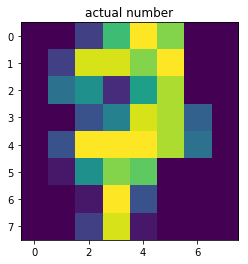

In [19]:
#machine prediction
print('prediction: ',clf2.predict(data_images[[112]]))
print('\n')
#actual number
plt.imshow(digits.images[112],cmap=plt.cm.viridis,interpolation='nearest')
plt.title('actual number')

In [20]:
predicted_rbf=clf2.predict(data_images[n_samples // 2:])
expected_rbf=digits.target[n_samples // 2:]


In [21]:
#print("Classification report for classifier %s:\n%s\n" % (clf2, metrics.classification_report(expected_rbf, predicted_rbf)))

In [22]:
print(metrics.accuracy_score(expected_rbf,predicted_rbf))

0.9699666295884316


In [23]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected_rbf, predicted_rbf))

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 87  1  0  0  0  0  0  2  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 82  0  3  0  2  4  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 87  1  0  0  3]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]
